In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


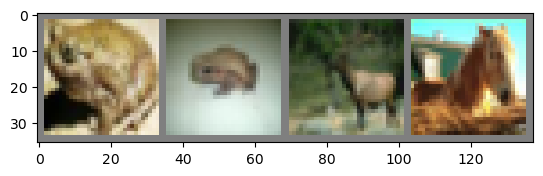

frog  frog  deer  horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# Use multiple layers with relu to transition from input to 110 neurons to 74 neurons to 10 neurons
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 110)
        self.fc2 = nn.Linear(110, 74)
        self.fc3 = nn.Linear(74, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
# Lists to store metrics for plotting
loss_metric = []
training_accuracy = []
test_accuracy = []

In [8]:
for epoch in range(50):  # loop over the dataset multiple times

    # Statistics
    correct = 0
    total = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics and calculate accuracy
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Record the training accuracy and loss
    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = correct / total
    loss_metric.append(epoch_loss)
    training_accuracy.append(epoch_accuracy)

    # Record the testing accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = correct / total
    test_accuracy.append(acc)

print('Finished Training')

[1,  2000] loss: 1.927
[1,  4000] loss: 1.713
[1,  6000] loss: 1.630
[1,  8000] loss: 1.644
[1, 10000] loss: 1.594
[1, 12000] loss: 1.572
[2,  2000] loss: 1.506
[2,  4000] loss: 1.483
[2,  6000] loss: 1.469
[2,  8000] loss: 1.456
[2, 10000] loss: 1.464
[2, 12000] loss: 1.455
[3,  2000] loss: 1.355
[3,  4000] loss: 1.381
[3,  6000] loss: 1.388
[3,  8000] loss: 1.375
[3, 10000] loss: 1.381
[3, 12000] loss: 1.396
[4,  2000] loss: 1.307
[4,  4000] loss: 1.301
[4,  6000] loss: 1.322
[4,  8000] loss: 1.337
[4, 10000] loss: 1.342
[4, 12000] loss: 1.306
[5,  2000] loss: 1.235
[5,  4000] loss: 1.258
[5,  6000] loss: 1.257
[5,  8000] loss: 1.256
[5, 10000] loss: 1.258
[5, 12000] loss: 1.292
[6,  2000] loss: 1.193
[6,  4000] loss: 1.202
[6,  6000] loss: 1.220
[6,  8000] loss: 1.225
[6, 10000] loss: 1.239
[6, 12000] loss: 1.233
[7,  2000] loss: 1.141
[7,  4000] loss: 1.187
[7,  6000] loss: 1.153
[7,  8000] loss: 1.202
[7, 10000] loss: 1.215
[7, 12000] loss: 1.197
[8,  2000] loss: 1.104
[8,  4000] 

In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

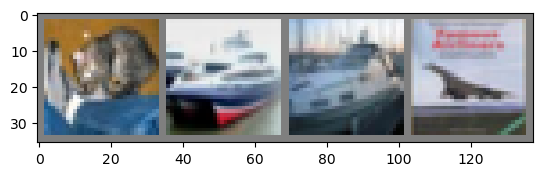

GroundTruth:  cat   ship  ship  plane


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  plane ship 


In [14]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 48 %


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 56.7 %
Accuracy for class: car   is 57.8 %
Accuracy for class: bird  is 39.8 %
Accuracy for class: cat   is 32.2 %
Accuracy for class: deer  is 38.1 %
Accuracy for class: dog   is 37.1 %
Accuracy for class: frog  is 51.4 %
Accuracy for class: horse is 52.9 %
Accuracy for class: ship  is 65.6 %
Accuracy for class: truck is 48.8 %


In [16]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


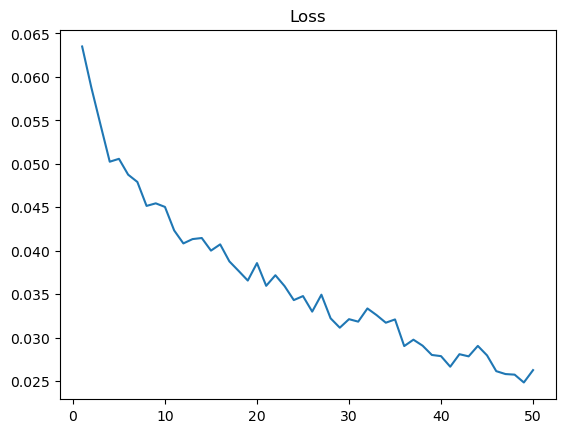

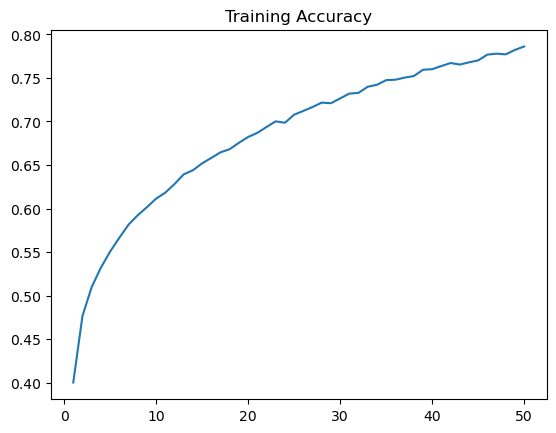

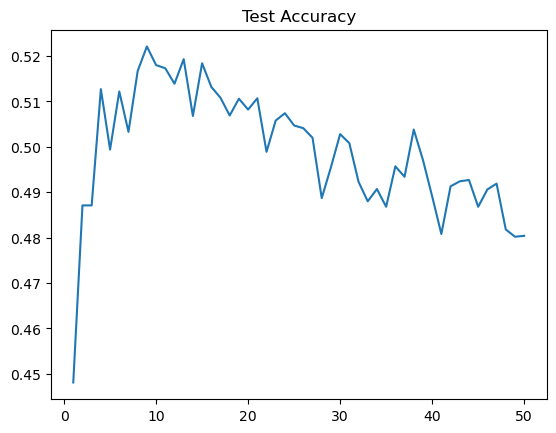

In [17]:
# Plotting the results
epochs = range(1, 51)

plt.plot(epochs, loss_metric)
plt.title('Loss')
plt.show()

plt.plot(epochs, training_accuracy)
plt.title('Training Accuracy')
plt.show()

plt.plot(epochs, test_accuracy)
plt.title('Test Accuracy')
plt.show()

If ReLU is not used, it seems that the loss is much higher per epoch on average and the training and test accuracies are much lower. This is because using activation functions like ReLU causes neural networks to learn more complex patterns via introducing non-linearity, allowing deep learning to achieve more than just linear mappings. For example, the test accuracy with ReLU is 48% and the test accuracy without is 37%.

In [18]:
del dataiter